<a href="https://colab.research.google.com/github/muzahid120/kaggle-competition/blob/Python-project/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3136%2F26502%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240321%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240321T162642Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dae1b9da96fdcb5be45623dbf21219b0eaad015c3dc3c689228fea85b30d6ddd7aa02136f026a054624b3bf3bc30463eb58afcfa93b3c7cd5d191f7b253987729ed57e8ee2b692100263502b45bef050d4dd928845c6b0d0e0a56f1a65d5039c6987a6e413b798ec7cca14232a10811957b61959f90b60ff27646e8eb99ca74a65e7f12338053fd756687260db2622551d45c076b0998c90fb69af369dd94c7e08a700dccdc8bae1683276babafbeebe973cab26c990ed949a7257a92ae1604d8c21dea6723590964125948939a563b5bd96360be228f9076e11d67bb6f88c84b03bd214813ba0f86b1cd377da976c8ac250ef5757cd805d388ef5b62431e6b59'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# remove less important columns

In [ ]:
train_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


# feature_construction

In [ ]:
train_df['family']=train_df['SibSp']+train_df['Parch']
test_df['family']=test_df['SibSp']+test_df['Parch']

In [ ]:
def convert(num):
    if num>=2:
        return 1
    elif num>=5 and num < 2:
        return 2
    else:
        return 3

In [ ]:
train_df['family']=train_df['family'].apply(convert)
test_df['family']=test_df['family'].apply(convert)

# check null values in data set

In [ ]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
family        0
dtype: int64

In [ ]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
family       0
dtype: int64

# Fill the null valu

In [ ]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode())
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())


# apply EDA

<Axes: xlabel='Sex'>

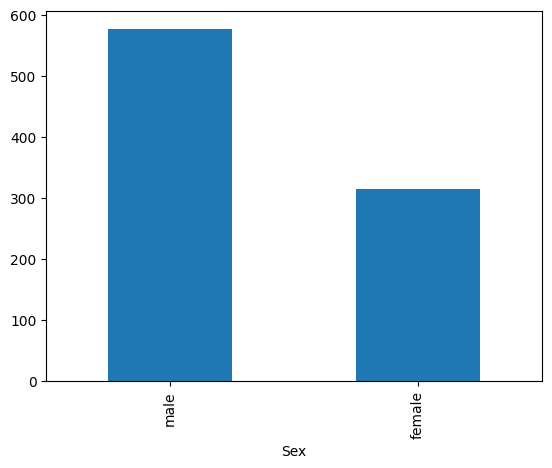

In [ ]:
train_df['Sex'].value_counts().plot(kind='bar')

<Axes: xlabel='Sex'>

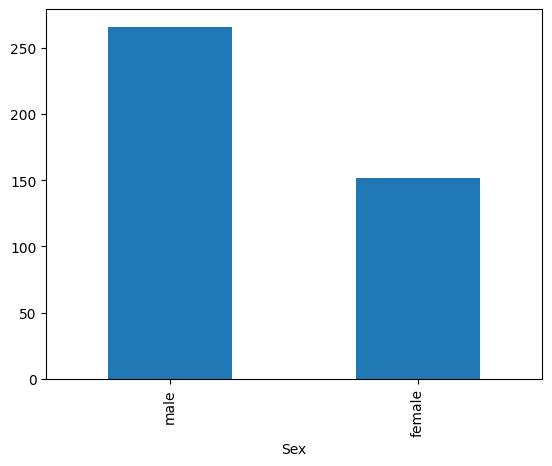

In [ ]:
test_df['Sex'].value_counts().plot(kind='bar')

<Axes: xlabel='Embarked'>

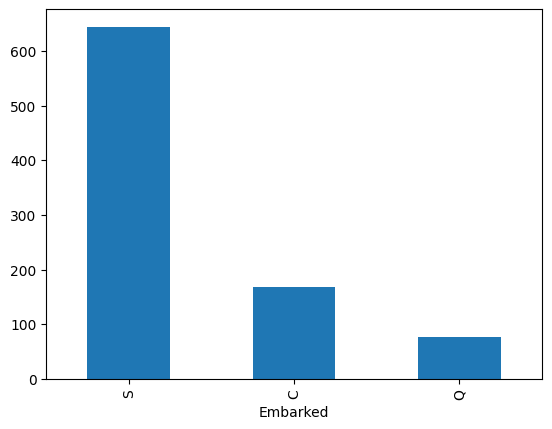

In [ ]:
train_df['Embarked'].value_counts().plot(kind='bar')

<Axes: xlabel='Embarked'>

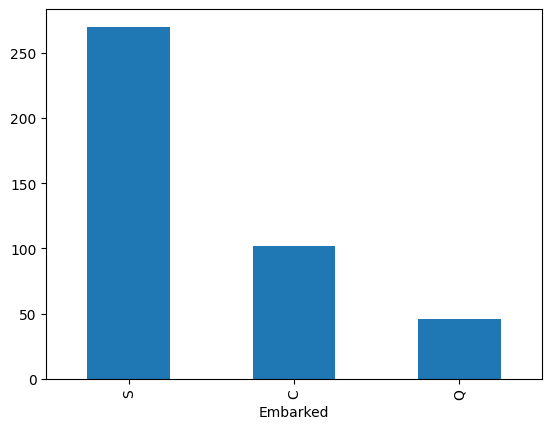

In [ ]:
test_df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

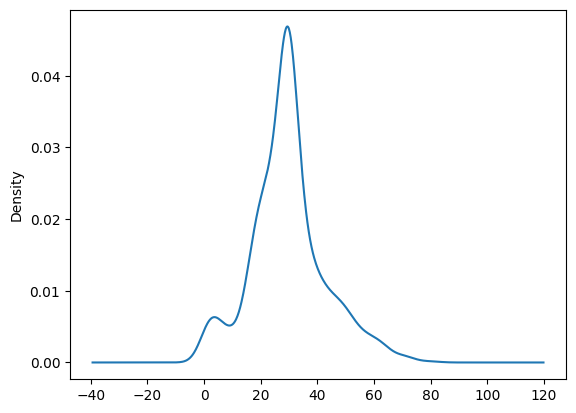

In [ ]:
train_df['Age'].plot(kind='kde')

<Axes: ylabel='Density'>

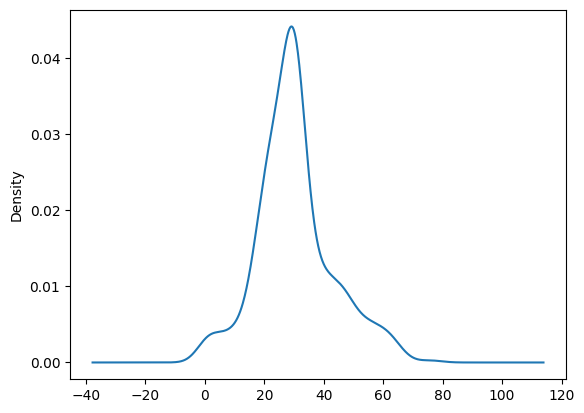

In [ ]:
test_df['Age'].plot(kind='kde')

<Axes: ylabel='Density'>

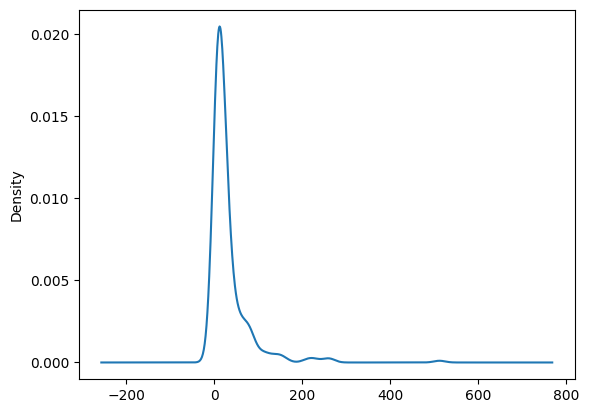

In [ ]:
train_df['Fare'].plot(kind='kde')

<Axes: ylabel='Density'>

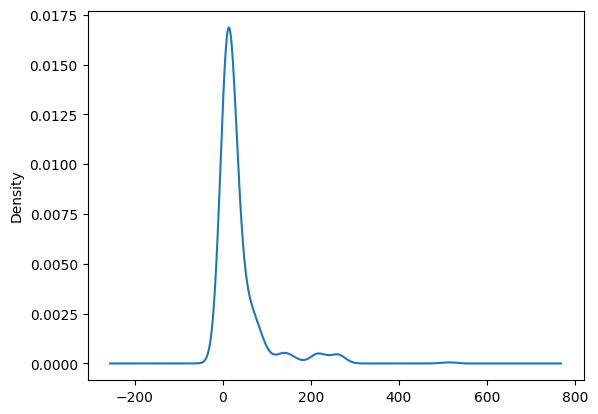

In [ ]:
test_df['Fare'].plot(kind='kde')

# handiling categorical data


In [ ]:
train_df=pd.get_dummies(train_df,columns=['Sex','Embarked'],drop_first=True)
test_df=pd.get_dummies(test_df,columns=['Sex','Embarked'],drop_first=True)

# Outlier Detection

<Axes: >

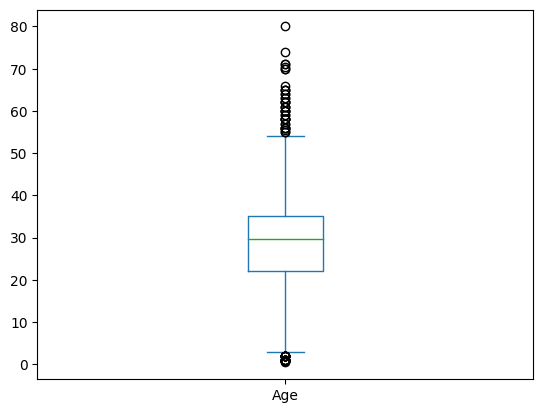

In [ ]:
train_df['Age'].plot(kind='box')

<Axes: >

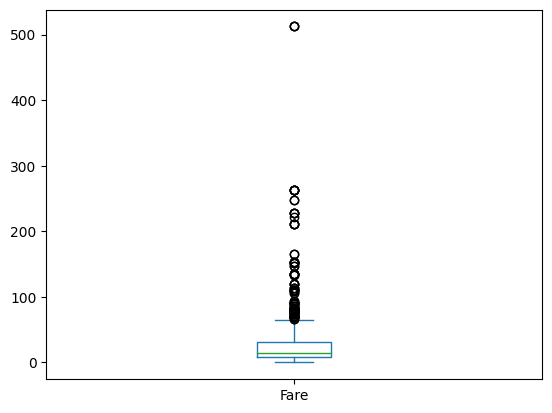

In [ ]:
train_df['Fare'].plot(kind='box')

<Axes: >

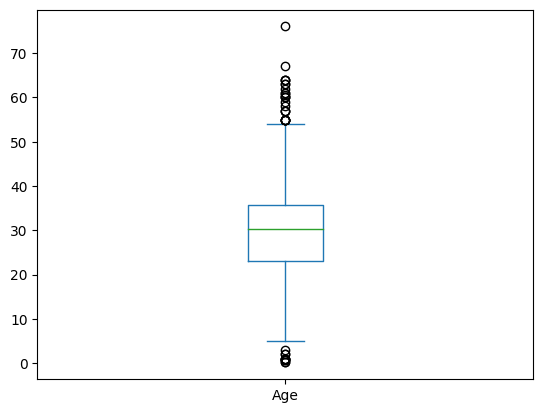

In [ ]:
test_df['Age'].plot(kind='box')

<Axes: >

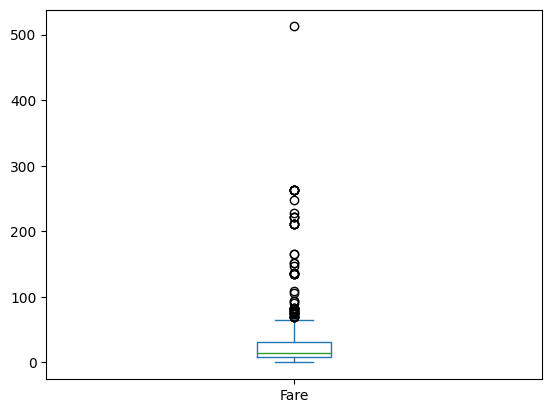

In [ ]:
test_df['Fare'].plot(kind='box')

# remove outliers

In [ ]:
quantile_25=train_df['Age'].quantile(0.25)
quantile_75=train_df['Age'].quantile(0.75)
iqr=quantile_75-quantile_25
upper_limit=quantile_75+1.5*iqr
lower_limit=quantile_25-1.5*iqr
train_df['Age']=np.where(train_df['Age']>=upper_limit,upper_limit,
        np.where(train_df['Age']<=lower_limit,lower_limit,train_df['Age']))

In [ ]:
quantile_25=train_df['Fare'].quantile(0.25)
quantile_75=train_df['Fare'].quantile(0.75)
iqr=quantile_75-quantile_25
upper_limit=quantile_75+1.5*iqr
lower_limit=quantile_25-1.5*iqr
train_df['Fare']=np.where(train_df['Fare']>=upper_limit,upper_limit,
        np.where(train_df['Fare']<=lower_limit,lower_limit,train_df['Fare']))

In [ ]:
quantile_25=test_df['Age'].quantile(0.25)
quantile_75=test_df['Age'].quantile(0.75)
iqr=quantile_75-quantile_25
upper_limit=quantile_75+1.5*iqr
lower_limit=quantile_25-1.5*iqr
test_df['Age']=np.where(test_df['Age']>=upper_limit,upper_limit,
        np.where(test_df['Age']<=lower_limit,lower_limit,test_df['Age']))

In [ ]:
quantile_25=test_df['Fare'].quantile(0.25)
quantile_75=test_df['Fare'].quantile(0.75)
iqr=quantile_75-quantile_25
upper_limit=quantile_75+1.5*iqr
lower_limit=quantile_25-1.5*iqr
test_df['Fare']=np.where(test_df['Fare']>=upper_limit,upper_limit,
        np.where(test_df['Fare']<=lower_limit,lower_limit,test_df['Fare']))

<Axes: >

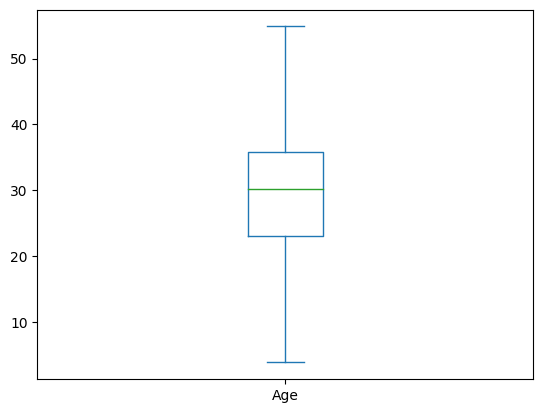

In [ ]:
test_df['Age'].plot(kind='box')

# scaling

In [ ]:
std=StandardScaler()

In [ ]:
cols=['Age','Fare']
train_df[cols]=std.fit_transform(train_df[cols])
test_df[cols]=std.transform(test_df[cols])

In [ ]:
X=train_df.drop(columns=['Survived'])
y=train_df['Survived']

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X.values,y.values)
y_pred=dt.predict(test_df.values)

In [ ]:
import pickle

file_name='model_final.pkl'
pickle.dump(dt,open(file_name,'wb'))

In [ ]:
pred=pd.DataFrame(y_pred)
submisson=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
dataset=pd.concat([submisson['PassengerId'],pred],axis=1)
dataset.columns=['PassengerId','Survived']
dataset.to_csv('titan_1_sub.csv')

In [ ]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X.values,y.values)
y_pred=dt.predict(test_df.values)

In [ ]:
sv=SVC(kernel='linear')
sv.fit(X.values,y.values)
y_pred=sv.predict(test_df.values)

In [ ]:
pred=pd.DataFrame(y_pred)
submisson=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
dataset=pd.concat([submisson['PassengerId'],pred],axis=1)
dataset.columns=['PassengerId','Survived']
dataset.to_csv('titan_5_sub.csv')

In [ ]:
y_test=dataset['Survived'].values

In [ ]:
accuracy_score(y_test,y_pred)

1.0